This jupyter notebook will help us in creating graphs and charts for our results. It will have basic functionality to calculate speedup and efficiency

In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

In [2]:
# loop through a list of threaded results and compare to sequential execution to find a df of threads, avg, sppedup, and efficiency
def calc_speedup(seq_list, thread_lists):
  seq_list.remove(max(seq_list))
  seq_list.remove(min(seq_list))
  seqAvg = np.average(seq_list)
  print('Sequential Execution time average: ', seqAvg)

  num_of_threads = 0
  results = []
  result_names = ['Threads', 'STD', 'Avg', 'Speedup', 'Efficiency']

  for thread_list in thread_lists:
    # Remove max and min for current list
    thread_list.remove(max(thread_list))
    thread_list.remove(min(thread_list))

    num_of_threads += 1
    thread_avg = round(np.average(thread_list), 3)
    speedup = round(seqAvg/thread_avg, 3)
    efficiency = round(speedup/num_of_threads, 3)
    standard_dev = round(np.std(thread_list), 5)
    results.append([num_of_threads, standard_dev, thread_avg, speedup, efficiency])

  df = pandas.DataFrame(results, columns=result_names)  
  return df

In [3]:
# Will take a dataframe with Avg, Speedup, and Efficiency and plot them
def plot_speedup(df):
  ax = plt.gca() 
  df.plot(kind = 'line', x = 'Threads', y = 'Avg', color = 'green', ax = ax)
  df.plot(kind = 'line',x = 'Threads', y = 'Speedup', color = 'blue', ax = ax)
  df.plot(kind = 'line',x = 'Threads', y = 'Efficiency', color = 'orange', ax = ax)
  plt.show();

In [4]:
# Will take a list of sequential results and return the average of the list
def avg(seq_list):
  seq_list.remove(max(seq_list))
  seq_list.remove(min(seq_list))
  seqAvg = np.average(seq_list)
  return seqAvg

In [6]:
seq_50_I = [0.002076, 0.000901, 0.001030, 0.000911, 0.000918, 0.000917, 0.000913]
seq_100_I = [0.001745, 0.002070, 0.001904, 0.001629, 0.001738, 0.001602, 0.001642]
seq_500_I = [0.007565, 0.008103, 0.009661, 0.007396, 0.006616, 0.007606, 0.007011]
seq_1000_I = [0.014518, 0.013678, 0.014778, 0.014314, 0.014415, 0.014477, 0.009118]

In [ ]:
# Execution times - simple addition of omp parrallel for
thread_1_list = []
thread_2_list = []
thread_3_list = []
thread_4_list = []
thread_5_list = []
thread_6_list = []
thread_7_list = []
thread_8_list = []
Seq_list = []

thread_lists = [thread_1_list, thread_2_list, thread_3_list, thread_4_list, thread_5_list, thread_6_list, thread_7_list, thread_8_list]

In [7]:
# print the averages of the sequential execution times
print('50 Iterations:', avg(seq_50_I))
print('100 Iterations:', avg(seq_100_I))
print('500 Iterations:', avg(seq_500_I))
print('1000 Iterations:', avg(seq_1000_I))

50 Iterations: 0.0009377999999999999
100 Iterations: 0.0017316000000000002
500 Iterations: 0.007536200000000002
1000 Iterations: 0.014280400000000002


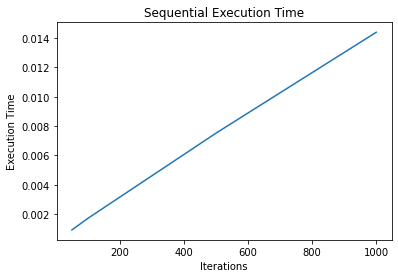

In [8]:
# plot the averages of the sequential execution times
seq_50_I_avg = avg(seq_50_I)
seq_100_I_avg = avg(seq_100_I)
seq_500_I_avg = avg(seq_500_I)
seq_1000_I_avg = avg(seq_1000_I)

seq_avg = [seq_50_I_avg, seq_100_I_avg, seq_500_I_avg, seq_1000_I_avg]
seq_iterations = [50, 100, 500, 1000]

plt.plot(seq_iterations, seq_avg)
plt.xlabel('Iterations')
plt.ylabel('Execution Time')
plt.title('Sequential Execution Time')
plt.show()


In [ ]:
df = calc_speedup(Seq_list, thread_lists)
df

In [9]:
seq = [0.543922, 0.539904, 0.542206, 0.540505, 0.542758, 0.549568, 0.540145]
med_seq = [9.475834, 9.463406, 9.556603, 9.353236, 9.466067, 9.390663, 9.415068]
large_seq = [60.906942, 65.791226, 61.495260, 65.909135, 66.292854, 60.697092, 66.009603]

avg(seq), avg(med_seq), avg(large_seq)

(0.534172, 8.0681866, 57.399931200000005)

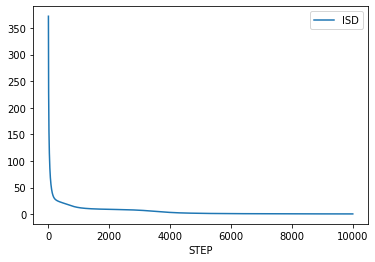

In [13]:
# read in ISD.txt file and plot the data
isd = pandas.read_csv('ISD.txt', sep = '\t')
isd.columns = ['STEP', 'ISD']
isd.plot(x = 'STEP', y = 'ISD')
plt.show()


In [12]:
from prettytable import PrettyTable

# # Block size tests - really see no joy at all. Too small? Not a localization issue?
# (base) denver:~/CS575/NMF$ ./test.sh 1 10000 ./test_data/med_data.dat 5 0 1 nmf
# 1 threads for nmf -N 6 -I 10000 -T 5 -B 1 ./test_data/med_data.dat
# 9.406589, 9.325238, 9.404208, 9.387634, 9.362653, 9.383552, 9.479898,

# (base) denver:~/CS575/NMF$ ./test.sh 6 10000 ./test_data/med_data.dat 5 0 10 nmfOpt
# 1 threads for nmfOpt -N 6 -I 10000 -T 5 -B 10 ./test_data/med_data.dat
# 9.722706, 9.579972, 9.661539, 9.737212, 9.599060, 9.676715, 9.564941,
# (base) denver:~/CS575/NMF$ ./test.sh 6 10000 ./test_data/med_data.dat 5 0 25 nmfOpt
# 1 threads for nmfOpt -N 6 -I 10000 -T 5 -B 25 ./test_data/med_data.dat
# 9.432991, 9.493594, 9.463730, 9.553460, 9.448938, 9.493673, 9.498362,
# (base) denver:~/CS575/NMF$ ./test.sh 6 10000 ./test_data/med_data.dat 5 0 50 nmfOpt
# 1 threads for nmfOpt -N 6 -I 10000 -T 5 -B 50 ./test_data/med_data.dat
# 9.466799, 9.534266, 9.450707, 9.495390, 9.564350, 9.529818, 9.465759,
# (base) denver:~/CS575/NMF$ ./test.sh 6 10000 ./test_data/med_data.dat 5 0 100 nmfOpt
# 1 threads for nmfOpt -N 6 -I 10000 -T 5 -B 100 ./test_data/med_data.dat
# 9.452977, 9.510970, 9.526947, 9.405941, 9.471033, 9.410863, 9.707120,
# (base) denver:~/CS575/NMF$ ./test.sh 6 10000 ./test_data/med_data.dat 5 0 250 nmfOpt
# 1 threads for nmfOpt -N 6 -I 10000 -T 5 -B 250 ./test_data/med_data.dat
# 9.408955, 9.560139, 9.436111, 9.338082, 9.544690, 9.416759, 9.575007,
# (base) denver:~/CS575/NMF$ ./test.sh 6 10000 ./test_data/med_data.dat 5 0 500 nmfOpt
# 1 threads for nmfOpt -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 9.504865, 9.649893, 9.623651, 9.458090, 9.513319, 9.504950, 9.535742,
# (base) denver:~/CS575/NMF$ ./test.sh 6 10000 ./test_data/med_data.dat 5 0 1000 nmfOpt
# 1 threads for nmfOpt -N 6 -I 10000 -T 5 -B 1000 ./test_data/med_data.dat
# 9.483290, 9.528004, 9.468683, 9.524097, 9.507855, 9.453468, 9.463101,
# (base) denver:~/CS575/NMF$ ./test.sh 6 10000 ./test_data/med_data.dat 5 0 2000 nmfOpt
# 1 threads for nmfOpt -N 6 -I 10000 -T 5 -B 2000 ./test_data/med_data.dat
# 9.462383, 9.553690, 9.712771, 9.667013, 9.557601, 9.412043, 9.534750,
# (base) denver:~/CS575/NMF$ ./test.sh 6 10000 ./test_data/med_data.dat 5 0 5000 nmfOpt
# 1 threads for nmfOpt -N 6 -I 10000 -T 5 -B 5000 ./test_data/med_data.dat
# 9.571613, 9.479653, 9.566766, 9.650081, 9.536227, 9.569641, 9.490401,
# (base) denver:~/CS575/NMF$ ./test.sh 6 10000 ./test_data/med_data.dat 5 0 10000 nmfOpt
# 1 threads for nmfOpt -N 6 -I 10000 -T 5 -B 10000 ./test_data/med_data.dat
# 9.470639, 9.565643, 9.551589, 9.517079, 9.560104, 9.457342, 9.522353,

# create arrays of the data
seq = [9.406589, 9.325238, 9.404208, 9.387634, 9.362653, 9.383552, 9.479898]
par_10 = [9.722706, 9.579972, 9.661539, 9.737212, 9.599060, 9.676715, 9.564941]
par_25 = [9.432991, 9.493594, 9.463730, 9.553460, 9.448938, 9.493673, 9.498362]
par_50 = [9.466799, 9.534266, 9.450707, 9.495390, 9.564350, 9.529818, 9.465759]
par_100 = [9.452977, 9.510970, 9.526947, 9.405941, 9.471033, 9.410863, 9.707120]
par_250 = [9.408955, 9.560139, 9.436111, 9.338082, 9.544690, 9.416759, 9.575007]
par_500 = [9.504865, 9.649893, 9.623651, 9.458090, 9.513319, 9.504950, 9.535742]
par_1000 = [9.483290, 9.528004, 9.468683, 9.524097, 9.507855, 9.453468, 9.463101]
par_2000 = [9.462383, 9.553690, 9.712771, 9.667013, 9.557601, 9.412043, 9.534750]
par_5000 = [9.571613, 9.479653, 9.566766, 9.650081, 9.536227, 9.569641, 9.490401]
par_10000 = [9.470639, 9.565643, 9.551589, 9.517079, 9.560104, 9.457342, 9.522353]

# find the average of each array using the avg method
seq_avg = avg(seq)
par_10_avg = avg(par_10)
par_25_avg = avg(par_25)
par_50_avg = avg(par_50)
par_100_avg = avg(par_100)
par_250_avg = avg(par_250)
par_500_avg = avg(par_500)
par_1000_avg = avg(par_1000)
par_2000_avg = avg(par_2000)
par_5000_avg = avg(par_5000)
par_10000_avg = avg(par_10000)

# create a table for the data with 4 decimal places of precision
table = PrettyTable(['Sequential', '10', '25', '50', '100', '250', '500', '1000', '2000', '5000', '10000'])
table.add_row([round(seq_avg, 4), round(par_10_avg, 4), round(par_25_avg, 4), round(par_50_avg, 4), round(par_100_avg, 4), round(par_250_avg, 4), round(par_500_avg, 4), round(par_1000_avg, 4), round(par_2000_avg, 4), round(par_5000_avg, 4), round(par_10000_avg, 4)])

# print the table
table


Sequential,10,25,50,100,250,500,1000,2000,5000,10000
9.3889,9.648,9.4797,9.4984,9.4746,9.4733,9.5365,9.4894,9.5551,9.5469,9.5244


In [10]:
import math

def calc_mean_and_variance(df):
    df_cols = ['iter_0', 'iter_1', 'iter_2', 'iter_3', 'iter_4', 'iter_5', 'iter_6']
    df_variance_cols = ['iter_0_variance', 'iter_1_variance', 'iter_2_variance', 'iter_3_variance', \
                        'iter_4_variance', 'iter_5_variance', 'iter_6_variance']

    df['adjusted_mean'] = 0
    df[df_variance_cols] = 0

    for index, row in df.iterrows():
        adjusted_mean = (row[df_cols].sum() - row[df_cols].min() - row[df_cols].max()) / (len(row[df_cols]) - 2)
        df.at[index, 'adjusted_mean'] = adjusted_mean
        
        speedup = df.at[0, 'adjusted_mean'] / adjusted_mean
        df.at[index, 'speedup'] = speedup
            
#         efficiency = speedup / df.at[index, 'num_procs']
#         df.at[index, 'efficiency'] = efficiency

    return df



In [18]:
desired_cols = ['program', 'data_set', 'n', 'i', 't', 'b', 'iter_0', 'iter_1', 'iter_2', \
                'iter_3', 'iter_4', 'iter_5', 'iter_6', 'adjusted_mean', 'speedup']

In [19]:
from IPython.display import display

def print_table(data):
    display(data[desired_cols].style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])\
            .set_properties(**{'text-align': 'center'}).hide(axis='index'))

In [13]:
data_nmfOpt = pandas.read_csv('results_nmfOpt.csv', delimiter=',', decimal='.')
data_nmfOpt

,program,data_set,n,i,t,b,iter_0,iter_1,iter_2,iter_3,iter_4,iter_5,iter_6
0,nmf,./test_data/med_data.dat,6,10000,5,2000,9.436242,9.421645,9.525775,9.398508,9.549011,9.388288,9.258341
1,nmfOpt,./test_data/med_data.dat,6,10000,5,2000,9.807438,9.907416,9.849492,9.738523,9.729240,9.868226,9.716479
2,nmfOpt,./test_data/med_data.dat,6,10000,5,4000,9.810212,9.786425,9.920421,9.800936,9.795945,9.760391,9.716161
3,nmfOpt,./test_data/med_data.dat,6,10000,5,6000,9.709845,9.695243,9.668188,9.878703,9.700642,9.825125,9.816635
4,nmfOpt,./test_data/med_data.dat,6,10000,5,8000,9.857310,9.719357,9.896216,9.898773,9.759559,9.611822,9.826119
5,nmfOpt,./test_data/med_data.dat,6,10000,5,10000,9.797785,9.758609,10.100007,9.819905,9.998548,9.634270,9.878986


In [20]:
adjusted_data_nmfOpt = calc_mean_and_variance(data_nmfOpt)
print_table(adjusted_data_nmfOpt)

program,data_set,n,i,t,b,iter_0,iter_1,iter_2,iter_3,iter_4,iter_5,iter_6,adjusted_mean,speedup
nmf,./test_data/med_data.dat,6,10000,5,2000,9.436242,9.421645,9.525775,9.398508,9.549011,9.388288,9.258341,9.434092,1.000000
nmfOpt,./test_data/med_data.dat,6,10000,5,2000,9.807438,9.907416,9.849492,9.738523,9.729240,9.868226,9.716479,9.798584,0.962802
nmfOpt,./test_data/med_data.dat,6,10000,5,4000,9.810212,9.786425,9.920421,9.800936,9.795945,9.760391,9.716161,9.790782,0.963569
nmfOpt,./test_data/med_data.dat,6,10000,5,6000,9.709845,9.695243,9.668188,9.878703,9.700642,9.825125,9.816635,9.749498,0.967649
nmfOpt,./test_data/med_data.dat,6,10000,5,8000,9.857310,9.719357,9.896216,9.898773,9.759559,9.611822,9.826119,9.811712,0.961513
nmfOpt,./test_data/med_data.dat,6,10000,5,10000,9.797785,9.758609,10.100007,9.819905,9.998548,9.634270,9.878986,9.850767,0.957701


In [26]:
import matplotlib.pyplot as plt

def plot_times(adjusted_data, fig_title='', fig_file_name='test.png'):
#     sieve_results = adjusted_data[::2]
#     sieve1_results = adjusted_data[1::2]
    seq_results = adjusted_data[:1]
    opt_results = adjusted_data[1:]

    fig, axs = plt.subplots(3, figsize=(8, 15))
    
    fig.suptitle(fig_title, y=1)
    
    axs[0].plot(opt_results['b'], opt_results['adjusted_mean'], label=fig_title)
    axs[0].hlines(y=seq_results['adjusted_mean'], xmin=2000, xmax=10000, colors='orange', label='jac sequential')
    axs[0].set_ylabel('Seconds')
    axs[0].legend(loc='upper right')
    axs[0].set_title(f"{fig_title} Execution Times")
    axs[0].set_xticks(opt_results['b'], opt_results['b'])
    axs[0].set_xlabel('Block size')
    
    axs[1].plot(opt_results['b'], opt_results['speedup'], label=fig_title) 
    axs[1].legend(loc='lower right')
    axs[1].set_ylabel('Ratio (x times)')
    axs[1].set_title(f"{fig_title} Speedup")
    axs[1].set_xticks(opt_results['b'], opt_results['b'])
    axs[1].set_xlabel('Block size')
    
#     axs[2].plot(buf1_results['num_procs'], buf1_results['efficiency'], label=fig_title + ' k=1')  
#     axs[2].plot(buf2_results['num_procs'], buf2_results['efficiency'], label=fig_title + ' k=2')  
#     axs[2].plot(buf3_results['num_procs'], buf3_results['efficiency'], label=fig_title + ' k=3')  
#     axs[2].plot(buf4_results['num_procs'], buf4_results['efficiency'], label=fig_title + ' k=4')  
#     axs[2].legend(loc='lower left')
#     axs[2].set_ylabel('Ratio')
#     axs[2].set_title(f"{fig_title} Efficiency")
#     axs[2].set_xticks(buf1_results['num_procs'], buf1_results['num_procs'])
#     axs[2].set_xlabel('Number of processes')
    
    
    fig.tight_layout()
    
    fig.savefig(fig_file_name, bbox_inches='tight')

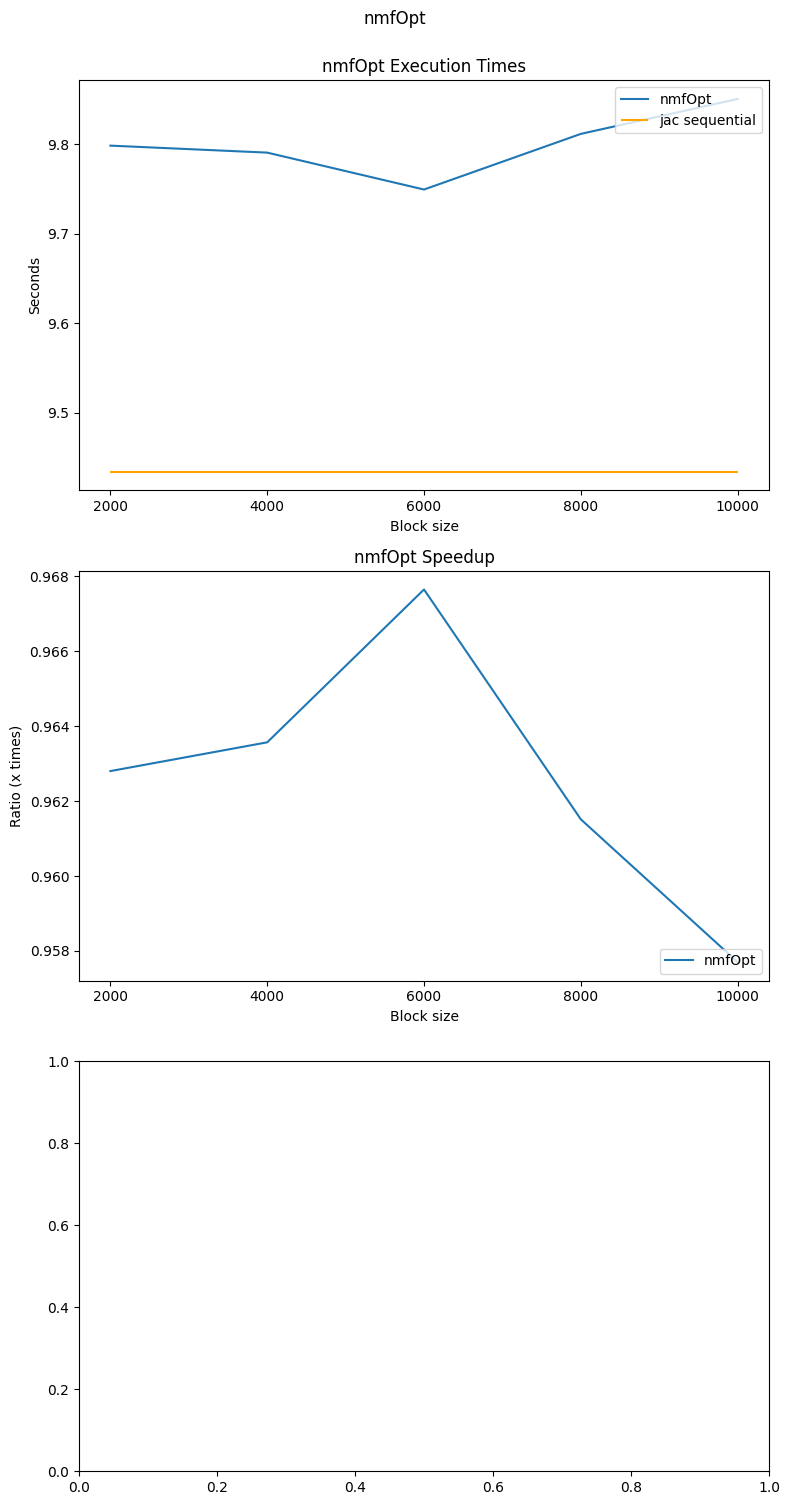

In [27]:
plot_times(adjusted_data_nmfOpt, 'nmfOpt', 'nmfOpt.png')